## Machine Learning model to predict Malaria Treatment using target data from ChEMBL Database

### Data Collection

In [1]:
# Package to retrieve bioactivity data from the ChEMBL Database.

# ! pip install chembl_webresource_client

In [2]:
# Install RDKIT

# pip install rdkit-pypi

# pip install padelpy

# pip install lazypredict

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor 

from chembl_webresource_client.new_client import new_client

from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

import lazypredict
from lazypredict.Supervised import LazyRegressor

import warnings
warnings.filterwarnings('ignore')

/home/blwasampijja/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
# Target search for Malaria
target = new_client.target
target_query = target.search('Plasmodium malariae')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Plasmodium malariae,Plasmodium malariae,30.00,False,CHEMBL613257,[],ORGANISM,5858
1,[],Homo sapiens,Duffy antigen/chemokine receptor,14.00,False,CHEMBL2321626,"[{'accession': 'Q16570', 'component_descriptio...",SINGLE PROTEIN,9606
2,[],Plasmodium falciparum,Plasmodium falciparum,12.00,False,CHEMBL364,[],ORGANISM,5833
3,[],Plasmodium berghei,Plasmodium berghei,12.00,False,CHEMBL612653,[],ORGANISM,5821
4,[],Plasmodium yoelii,Plasmodium yoelii,12.00,False,CHEMBL612889,[],ORGANISM,5861
5,[],Plasmodium cynomolgi,Plasmodium cynomolgi,12.00,False,CHEMBL613883,[],ORGANISM,5827
6,[],Plasmodium chabaudi,Plasmodium chabaudi,12.00,False,CHEMBL613256,[],ORGANISM,5825
7,[],Plasmodium knowlesi,Plasmodium knowlesi,12.00,False,CHEMBL613011,[],ORGANISM,5850
8,[],Plasmodium vivax,Plasmodium vivax,12.00,False,CHEMBL613013,[],ORGANISM,5855
9,[],Plasmodium gallinaceum,Plasmodium gallinaceum,12.00,False,CHEMBL3301401,[],ORGANISM,5849


In [5]:
# Randomly selecting different and testing out with different targets

selected_target = 'CHEMBL2366922'

In [6]:
# Retrieve bioactivity data for selected target with reported IC50 values

activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")
dfn = pd.DataFrame.from_dict(res)
dfn.head(5)

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,12393147,[],CHEMBL3051455,Antimalarial activity against chloroquine-sens...,F,None,None,BAO_0000190,BAO_0000218,...,Plasmodium falciparum 3D7,Plasmodium falciparum 3D7,36329,None,None,IC50,ng/ml,UO_0000274,None,22.3
1,None,12393154,[],CHEMBL3051455,Antimalarial activity against chloroquine-sens...,F,None,None,BAO_0000190,BAO_0000218,...,Plasmodium falciparum 3D7,Plasmodium falciparum 3D7,36329,None,None,IC50,ug ml-1,UO_0000274,None,50.0
2,None,12393161,[],CHEMBL3051455,Antimalarial activity against chloroquine-sens...,F,None,None,BAO_0000190,BAO_0000218,...,Plasmodium falciparum 3D7,Plasmodium falciparum 3D7,36329,None,None,IC50,ug ml-1,UO_0000274,None,50.0
3,None,12393168,[],CHEMBL3051455,Antimalarial activity against chloroquine-sens...,F,None,None,BAO_0000190,BAO_0000218,...,Plasmodium falciparum 3D7,Plasmodium falciparum 3D7,36329,None,None,IC50,ug ml-1,UO_0000274,None,8.5
4,None,12393175,[],CHEMBL3051455,Antimalarial activity against chloroquine-sens...,F,None,None,BAO_0000190,BAO_0000218,...,Plasmodium falciparum 3D7,Plasmodium falciparum 3D7,36329,None,None,IC50,ug ml-1,UO_0000274,None,6.2


In [7]:
selection = ['molecule_chembl_id', 'canonical_smiles', 'standard_value']
dfm = dfn[selection]
dfm.head(5)

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL76,CCN(CC)CCCC(C)Nc1ccnc2cc(Cl)ccc12,0.0223
1,CHEMBL2237985,O=C(/C=C/c1ccco1)c1c(O)c2ccccc2oc1=O,50.0
2,CHEMBL2234257,COc1cc(/C=C/C(=O)c2c(O)c3ccccc3oc2=O)cc(OC)c1OC,50.0
3,CHEMBL2237984,COc1ccc(/C=C/C(=O)c2c(O)c3ccccc3oc2=O)c(OC)c1OC,8.5
4,CHEMBL2237983,COc1ccc(/C=C/C(=O)c2c(O)c3ccccc3oc2=O)cc1OC,6.2


In [8]:
dfm.dtypes

molecule_chembl_id    object
canonical_smiles      object
standard_value        object
dtype: object

In [9]:
# Convert standart value to number column
dfm["standard_value"] = pd.to_numeric(dfm["standard_value"])

In [10]:
dfm.dtypes

molecule_chembl_id     object
canonical_smiles       object
standard_value        float64
dtype: object

In [11]:
# create a list of our conditions
conditions = [
    (dfm['standard_value'] >= 10000),
    (dfm['standard_value'] > 1000) & (dfm['standard_value'] <= 9999),
    (dfm['standard_value'] <= 1000)
    ]

# create a list of the values we want to assign for each condition
values = ['Inactive','Intermediate', 'Active']

dfm['bioactivity_class'] = np.select(conditions, values)

# display updated DataFrame
dfm.head(5)

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL76,CCN(CC)CCCC(C)Nc1ccnc2cc(Cl)ccc12,0.02,Active
1,CHEMBL2237985,O=C(/C=C/c1ccco1)c1c(O)c2ccccc2oc1=O,50.00,Active
2,CHEMBL2234257,COc1cc(/C=C/C(=O)c2c(O)c3ccccc3oc2=O)cc(OC)c1OC,50.00,Active
3,CHEMBL2237984,COc1ccc(/C=C/C(=O)c2c(O)c3ccccc3oc2=O)c(OC)c1OC,8.50,Active
4,CHEMBL2237983,COc1ccc(/C=C/C(=O)c2c(O)c3ccccc3oc2=O)cc1OC,6.20,Active


In [12]:
dfm.shape

(1688, 4)

In [13]:
# dropping ALL duplicate molecule_chembl_id	values
dfm.drop_duplicates(subset ="molecule_chembl_id",
                     keep = False, inplace = True)

In [14]:
df = dfm.dropna()

In [15]:
df.shape

(1320, 4)

In [16]:
# Calculate Lipinski descriptors
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [17]:
df_lipinski = lipinski(df.canonical_smiles)
df_lipinski.head(3)

,MW,LogP,NumHDonors,NumHAcceptors
0,282.25,2.99,1.00,5.00
1,382.37,3.42,1.00,7.00
2,382.37,3.42,1.00,7.00


In [18]:
df_lipinski.shape

(1320, 4)

In [19]:
#  Combining the two dataframes

dfc = pd.concat([df,df_lipinski], axis=1)
dfc = dfc.dropna()
dfc.head(5)

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
1,CHEMBL2237985,O=C(/C=C/c1ccco1)c1c(O)c2ccccc2oc1=O,50.00,Active,382.37,3.42,1.00,7.00
2,CHEMBL2234257,COc1cc(/C=C/C(=O)c2c(O)c3ccccc3oc2=O)cc(OC)c1OC,50.00,Active,382.37,3.42,1.00,7.00
3,CHEMBL2237984,COc1ccc(/C=C/C(=O)c2c(O)c3ccccc3oc2=O)c(OC)c1OC,8.50,Active,352.34,3.41,1.00,6.00
4,CHEMBL2237983,COc1ccc(/C=C/C(=O)c2c(O)c3ccccc3oc2=O)cc1OC,6.20,Active,338.32,3.11,2.00,6.00
5,CHEMBL242326,COc1cc(/C=C/C(=O)c2c(O)c3ccccc3oc2=O)ccc1O,11.20,Active,322.32,3.40,1.00,5.00


In [20]:
# To allow IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale which is essentially -log10(IC50).
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [21]:
dfc.standard_value.describe()

count       1084.00
mean       42357.22
std       754492.66
min            0.00
25%           49.45
50%          390.00
75%         3952.50
max     22700000.00
Name: standard_value, dtype: float64

In [22]:
#Cap max value to to 1m to prevent  negative values

-np.log10( (10**-9)* 100000000 )

1.0

In [23]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [24]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [25]:
# Apply the norm_value() function so that the values in the standard_value column is normalized.
df_norm = norm_value(dfc)
df_norm.head(5)

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
1,CHEMBL2237985,O=C(/C=C/c1ccco1)c1c(O)c2ccccc2oc1=O,Active,382.37,3.42,1.00,7.00,50.00
2,CHEMBL2234257,COc1cc(/C=C/C(=O)c2c(O)c3ccccc3oc2=O)cc(OC)c1OC,Active,382.37,3.42,1.00,7.00,50.00
3,CHEMBL2237984,COc1ccc(/C=C/C(=O)c2c(O)c3ccccc3oc2=O)c(OC)c1OC,Active,352.34,3.41,1.00,6.00,8.50
4,CHEMBL2237983,COc1ccc(/C=C/C(=O)c2c(O)c3ccccc3oc2=O)cc1OC,Active,338.32,3.11,2.00,6.00,6.20
5,CHEMBL242326,COc1cc(/C=C/C(=O)c2c(O)c3ccccc3oc2=O)ccc1O,Active,322.32,3.40,1.00,5.00,11.20


In [26]:
df_norm.standard_value_norm.describe()

count       1084.00
mean       42357.22
std       754492.66
min            0.00
25%           49.45
50%          390.00
75%         3952.50
max     22700000.00
Name: standard_value_norm, dtype: float64

In [27]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
1,CHEMBL2237985,O=C(/C=C/c1ccco1)c1c(O)c2ccccc2oc1=O,Active,382.37,3.42,1.00,7.00,7.30
2,CHEMBL2234257,COc1cc(/C=C/C(=O)c2c(O)c3ccccc3oc2=O)cc(OC)c1OC,Active,382.37,3.42,1.00,7.00,7.30
3,CHEMBL2237984,COc1ccc(/C=C/C(=O)c2c(O)c3ccccc3oc2=O)c(OC)c1OC,Active,352.34,3.41,1.00,6.00,8.07
4,CHEMBL2237983,COc1ccc(/C=C/C(=O)c2c(O)c3ccccc3oc2=O)cc1OC,Active,338.32,3.11,2.00,6.00,8.21
5,CHEMBL242326,COc1cc(/C=C/C(=O)c2c(O)c3ccccc3oc2=O)ccc1O,Active,322.32,3.40,1.00,5.00,7.95
...,...,...,...,...,...,...,...,...
1315,CHEMBL3617666,CCOc1cccc2c1OC(NC)=C([N+](=O)[O-])C2c1ccc(N2CC...,Intermediate,287.33,3.56,2.00,4.00,5.53
1316,CHEMBL3617665,CNC1=C([N+](=O)[O-])C(c2ccc(N3CCN(c4ccnc5cc(Cl...,Intermediate,301.35,3.87,2.00,4.00,5.61
1317,CHEMBL3617664,CNC1=C([N+](=O)[O-])C(c2ccc(N3CCN(c4ccnc5cc(Cl...,Active,363.42,5.22,2.00,4.00,6.21
1318,CHEMBL3617663,CNC1=C([N+](=O)[O-])C(c2ccc(N3CCN(c4ccnc5cc(Cl...,Intermediate,252.28,1.81,1.00,6.00,5.73


In [28]:
# Remove Intermediate class

df = df_final[df_final.bioactivity_class != 'Intermediate']
df.shape

(868, 8)

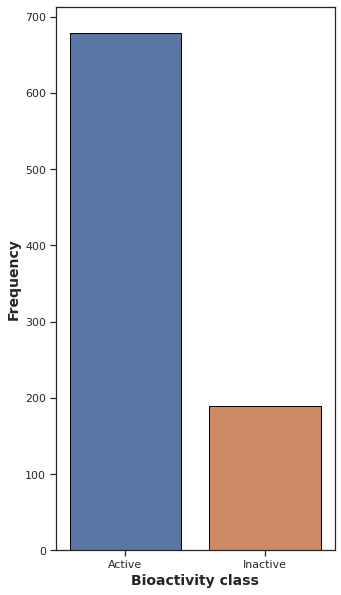

In [29]:
plt.figure(figsize=(5, 10))

sns.countplot(x='bioactivity_class', data=df, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.png')

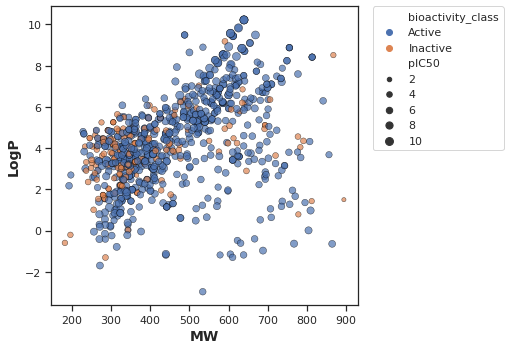

In [30]:
# Scatter plot of MW versus LogP

plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

In [31]:
# Calculating molecular descriptors (quantitative description) of the compounds in the dataset using PaDEL-Descriptor tool

# Download the toolkit

# ! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
# ! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

In [32]:
# ! unzip padel.zip

In [33]:
selection = ['canonical_smiles','molecule_chembl_id']
df2 = df[selection]
df2.to_csv('molecule.smi', sep='\t', index=False, header=False)
df2.head(3)

,canonical_smiles,molecule_chembl_id
1,O=C(/C=C/c1ccco1)c1c(O)c2ccccc2oc1=O,CHEMBL2237985
2,COc1cc(/C=C/C(=O)c2c(O)c3ccccc3oc2=O)cc(OC)c1OC,CHEMBL2234257
3,COc1ccc(/C=C/C(=O)c2c(O)c3ccccc3oc2=O)c(OC)c1OC,CHEMBL2237984


In [34]:
# calculate fingerprints

# !bash padel.sh

In [35]:
dfo = pd.read_csv('descriptors_output.csv')
dfo.head(3)

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL2237985,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL2237984,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL2234257,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
dfy = dfo.drop(columns=['Name'])
dfy.head(3)

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [37]:
dfx = df['pIC50']

In [38]:
dataset = pd.concat([dfx,dfy], axis=1)

In [39]:
dataset.head(3)

,pIC50,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,nan,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,7.30,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,7.30,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [40]:
dataset.to_csv('dataset.csv', index=False)

In [41]:
dataset = dataset.dropna()
dataset.head(3)

,pIC50,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
1,7.30,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,7.30,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,8.07,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [42]:
X = dataset.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
1,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
862,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
863,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
864,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [43]:
Y = dataset.pIC50
Y

1     7.30
2     7.30
3     8.07
4     8.21
5     7.95
      ... 
861   6.34
862   6.49
863   6.70
864   6.29
865   6.40
Name: pIC50, Length: 587, dtype: float64

In [44]:
# Remove low variance features

from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP2,PubchemFP3,PubchemFP12,PubchemFP13,PubchemFP15,PubchemFP16,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP23,...,PubchemFP750,PubchemFP758,PubchemFP776,PubchemFP777,PubchemFP780,PubchemFP797,PubchemFP798,PubchemFP813,PubchemFP819,PubchemFP821
1,1.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00
2,1.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00
3,1.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00
4,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00
5,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,1.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
862,1.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
863,1.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
864,1.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00


In [45]:
X.shape

(587, 239)

In [46]:
X.to_csv('descriptor_list.csv', index = False)

In [47]:
#Splitting Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [48]:
X_train.shape, Y_train.shape

((469, 239), (469,))

In [49]:
X_test.shape, Y_test.shape

((118, 239), (118,))

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [57]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.9364777759651115

In [58]:
Y_pred = model.predict(X_test)

<function matplotlib.pyplot.show(close=None, block=None)>

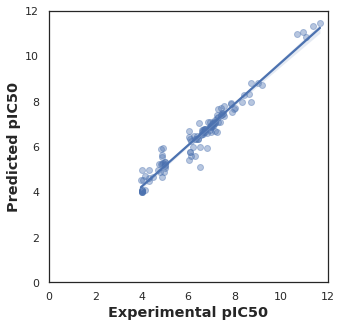

In [60]:
# Scatter Plot of Experimental vs Predicted pIC50 Values

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

In [61]:
# Compare models using lazy Predict 
# Defines and builds the lazyclassifier

clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:00<00:00, 251299.24it/s]


In [62]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.95,0.97,0.30,0.05
ExtraTreeRegressor,0.95,0.97,0.30,0.05
ExtraTreesRegressor,0.95,0.97,0.30,1.09
GaussianProcessRegressor,0.95,0.97,0.30,0.16
XGBRegressor,0.95,0.97,0.30,0.40
RandomForestRegressor,0.85,0.93,0.50,0.88
MLPRegressor,0.83,0.92,0.53,1.59
BaggingRegressor,0.81,0.91,0.56,0.16
HistGradientBoostingRegressor,0.77,0.89,0.62,2.27


In [63]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,


[(0.0, 1.0)]

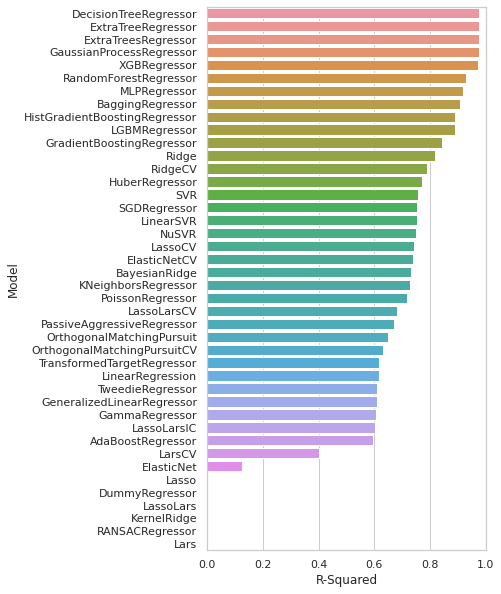

In [64]:
# Bar plot of R-squared values

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

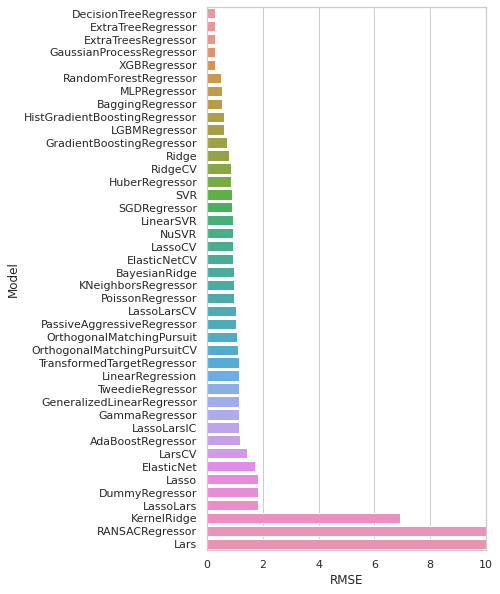

In [65]:
# Bar plot of RMSE values

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

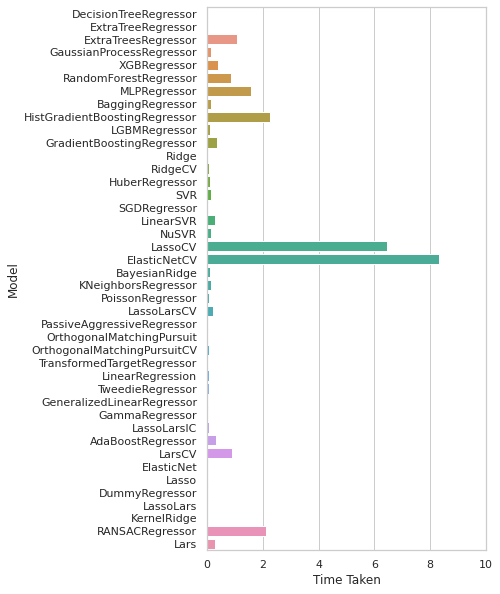

In [66]:
# Bar plot of calculation time

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))

In [67]:
# Save Model as Pickle Object
import pickle

In [68]:
pickle.dump(model, open('malaria_model.pkl', 'wb'))